# Explore here

[2.69, 2.83, 4.37, 4.09, 3.88, 4.21, 2.97, 4.26, 3.32, 2.89]


,nombre,popularidad,duracion_minutos
0,"Signed, Sealed, Delivered (I'm Yours)",80,2.69
1,For Once In My Life,79,2.83
2,I Just Called To Say I Love You,78,4.37
3,Superstition - Single Version,77,4.09
4,Sir Duke,75,3.88
5,Part-Time Lover,72,4.21
6,You Are The Sunshine Of My Life,73,2.97
7,That's What Friends Are For,43,4.26
8,Isn't She Lovely,70,3.32
9,My Cherie Amour,70,2.89


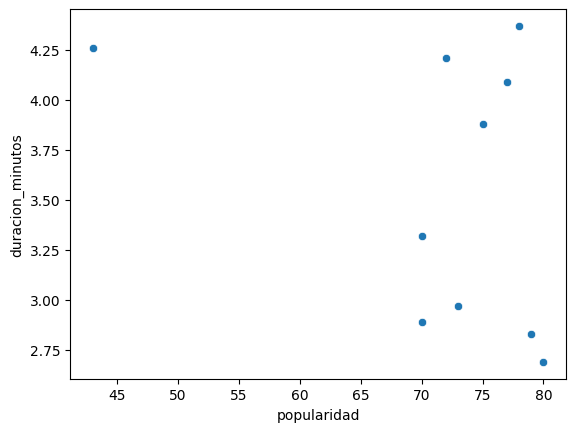

In [1]:
import os
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import spotipy
from dotenv import load_dotenv
from spotipy.oauth2 import SpotifyClientCredentials
load_dotenv()

client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')



spot = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))
SW_uri = 'spotify:artist:7guDJrEfX3qb6FEbdPA5qi'

results = spot.artist_top_tracks(SW_uri)

top10_name= []
top10_duration_ms = []
top10_popularity = []
for track in results['tracks'][:10]:
    top10_name.append(track['name'])
    top10_duration_ms.append(round((track['duration_ms']/1000)/60, 2))
    top10_popularity.append(track['popularity'])
    
print(top10_duration_ms)
top10_df = pd.DataFrame(list(zip(top10_name, top10_popularity, top10_duration_ms)), columns=['nombre', 'popularidad', 'duracion_minutos'])
display(top10_df)


sbn.scatterplot(x='popularidad', y='duracion_minutos', data=top10_df)
plt.show()

### Conclusiones
No se observa ninguna relación entre duración y popularidad. Casi todos los datos estan distribuidos en el mismo rango de 
popularidad independientemente de la duración de la canción a excepcion de 'That's What Friends Are For' que es realmente mala :)